In [1]:
!ls frames

0000.jpg  0006.jpg  0012.jpg  0018.jpg	0024.jpg  deepdream-withsubs.mp4
0001.jpg  0007.jpg  0013.jpg  0019.jpg	0025.jpg  out.mp4
0002.jpg  0008.jpg  0014.jpg  0020.jpg	0026.jpg  Start2.srt
0003.jpg  0009.jpg  0015.jpg  0021.jpg	0027.jpg  Start.srt
0004.jpg  0010.jpg  0016.jpg  0022.jpg	0028.jpg  subtitle.ass
0005.jpg  0011.jpg  0017.jpg  0023.jpg	0029.jpg


In [8]:
!ls images

003.jpg     man.jpg    seq	    testingagain.jpg
island.jpg  NewFolder  SStest2.png  ztextbacktmp.png


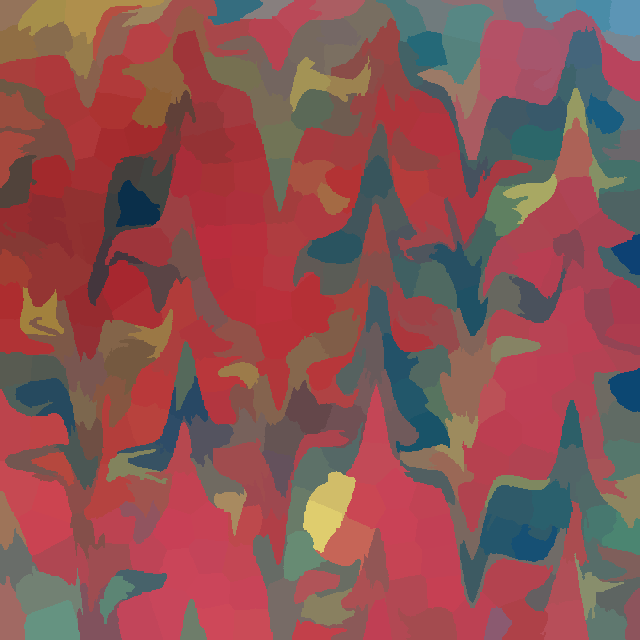

In [9]:
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
im = Image.open('images/SStest2.png')
im

# Look in the JupyterNotebook-Twitter for details to post to twitter

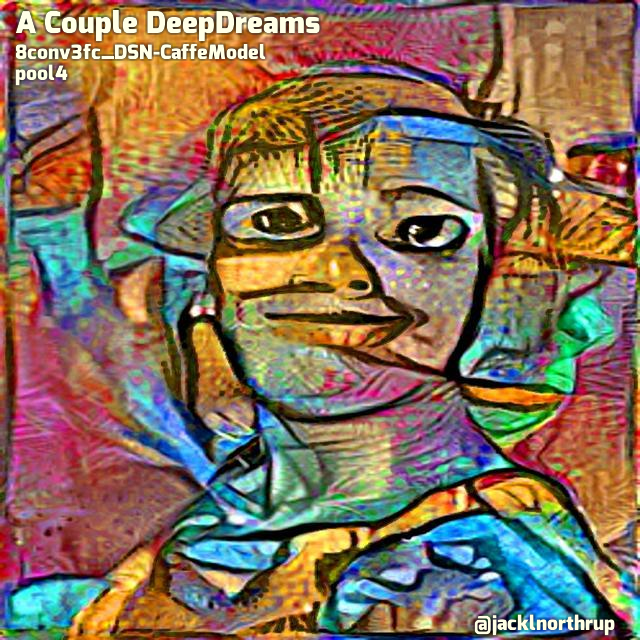

In [4]:
import random
from random import randint
import time
import markovify
import os
import sys
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter

filename0 = "images/xxxout_687.png"

def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black
    #textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_blurred_back(inp, (15, 4), "A Couple DeepDreams", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    i2 = draw_blurred_back(i2, (15, 40), "8conv3fc_DSN-CaffeModel", font0, text_title, blur_title)    
    i2 = draw_blurred_back(i2, (15, 60), "pool4", font0, text_title, blur_title)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

PATH = "images/TEMP_POST.png"
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')
image = Image.open(PATH)
image

# Pick a random file from a directory of images

In [23]:
import os
import random
from PIL import Image
PATH = "images"
def get_picture_list(PATH):
    abs_path = os.path.join(os.getcwd(),PATH)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    FILE = random.choice(dir_files)
    files = "".join(PATH+"/"+FILE)
    return files

PATH = "images"
get_picture_list(PATH)

abs_path = /home/jack/Desktop/JupyterNotebook-Graphics/images


'images/nose.jpg'

In [29]:
import os
import random
from PIL import Image
PATH = "images"
def get_picture_list(PATH):
    abs_path = os.path.join(os.getcwd(),PATH)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    for file in dir_files:
        #dir_file = file.endswith("*.png")
        #FILE = random.choice(dir_file)
        #files = "".join(PATH+"/"+FILE)
        return file

PATH = "images"
get_picture_list(PATH)

abs_path = /home/jack/Desktop/JupyterNotebook-Graphics/images


'nose-rotate.jpg'

In [ ]:
INFO Found Here:
31 
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list
------------
get_picture_list, get list of files, get a file list in memory
files in memeory , file list memory 


INFO Found Here:
38 
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def create_or_open_db(db_file):
    db_is_new = not os.path.exists(db_file)
    conn = sqlite3.connect(db_file)
    if db_is_new:
        print 'Creating schema'
        sql = '''create table if not exists PICTURES(
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        PICTURE BLOB,
        TYPE TEXT,
        FILE_NAME TEXT);'''
        conn.execute(sql) # shortcut for conn.cursor().execute(sql)
    else:
        print 'Schema exists
'
    return conn

def insert_picture(picture_file):
    with open(picture_file, 'rb') as input_file:
        conn = sqlite3.connect(dbname)
        c = conn.cursor()
        ablob = input_file.read()
        base=os.path.basename(picture_file)
        afile, ext = os.path.splitext(base)
        sql = '''INSERT INTO PICTURES
        (PICTURE, TYPE, FILE_NAME)
        VALUES(?, ?, ?);'''
        c.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
        conn.commit()

def loadimages(dbname, path):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    #conn.execute("DELETE FROM PICTURES")
    for fn in picture_list:
        picture_file = path+"/"+fn
        insert_picture(picture_file)

    for r in c.execute("SELECT rowid, FILE_NAME FROM PICTURES"):
        print r[0],r[1]
   
    conn.commit()


def get_image(picture_id):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    c.execute("SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = ?;",(picture_id,))
    #sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = 19"
    param = {'id': picture_id}
    #c.execute(sql, param)
    ablob, ext, afile = c.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename


dbname = "ImageC.db"
db_file = create_or_open_db(dbname)
path = "snippets/"
loadimages(dbname, path)
filename = get_image(16)
print filename
Image(filename=filename)

-----------------
store, retrieve images,SQLite Databasestore,
retrieve images, from SQLite , Database


INFO Found Here:
40 
%%writefile Image2SQLite.py
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def getImage_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    return dir_files

def create_or_open_db(dbname):
    db_is_new = not os.path.exists(db_file)
    conn = sqlite3.connect(db_file)
    if db_is_new:
        print 'Creating schema'
        sql = '''create table if not exists images(
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        image BLOB,
        TYPE TEXT,
        imagE TEXT);'''
        conn.execute(sql) # shortcut for conn.cursor().execute(sql)
    else:
        print 'Schema exists
'
        conn.commit()
        conn.close()
    return conn

def insertImage(dbname, imageFile):
    with open(imageFile, 'rb') as input_file:
        conn = sqlite3.connect(dbname)
        c = conn.cursor()
        ablob = input_file.read()
        base=os.path.basename(imageFile)
        afile, ext = os.path.splitext(base)
        sql = '''INSERT INTO images
        (image, TYPE, imagE)
        VALUES(?, ?, ?);'''
        c.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
        conn.commit()

def loadimagE(dbname, path):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    #conn.execute("DELETE FROM images")
    for fn in image_list:
        imageFile = path+"/"+fn
        insertImage(imageFile)

    for r in c.execute("SELECT rowid, imagE FROM images"):
        print r[0],r[1]
   
    conn.commit()
    conn.close()

def image_id(dbname):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    rows = c.execute("SELECT rowid, TYPE, imagE FROM images")
    for row in rows:
        print row[0],row[2]+row[1]    
    return
    
def get_image(dbname,image_id):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    c.execute("SELECT image, TYPE, imagE FROM images WHERE id = ?;",(image_id,))
    #sql = "SELECT image, TYPE, imagE FROM images WHERE id = 19"
    param = {'id': image_id}
    #c.execute(sql, param)
    ablob, ext, afile = c.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename
---------------
USAGE:
import Image2Data
picture_list = Image2Data.get_picture_list('snippets')
print picture_list

import Image2Data
dbname = "ImageE.db"
Image2Data.create_or_open_db(dbname)

#insert one image
import Image2Data
dbname = "ImageD.db"
picture_file = "01.jpg"
Image2Data.insert_picture(dbname, picture_file)

import Image2Data
dbname = "ImageD.db"
path = "snippets"
loadimages(dbname, path)

def image_id(dbname):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    rows = c.execute("SELECT rowid, TYPE, FILE_NAME FROM PICTURES")
    for row in rows:
        print row[0],row[2]+row[1]
    
#list images by id
dbname = "ImageD.db"
image_id(dbname)

#retrieve image by id
filename = get_image(dbname,1)
print filename
Image(filename=filename)




INFO Found Here:
41 
%%writefile Image2SQLite.py
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def getImage_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    return dir_files

def create_or_open_db(dbname):
    db_is_new = not os.path.exists(db_file)
    conn = sqlite3.connect(db_file)
    if db_is_new:
        print 'Creating schema'
        sql = '''create table if not exists images(
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        image BLOB,
        TYPE TEXT,
        imagE TEXT);'''
        conn.execute(sql) # shortcut for conn.cursor().execute(sql)
    else:
        print 'Schema exists
'
        conn.commit()
        conn.close()
    return conn

def insertImage(dbname, imageFile):
    with open(imageFile, 'rb') as input_file:
        conn = sqlite3.connect(dbname)
        c = conn.cursor()
        ablob = input_file.read()
        base=os.path.basename(imageFile)
        afile, ext = os.path.splitext(base)
        sql = '''INSERT INTO images
        (image, TYPE, imagE)
        VALUES(?, ?, ?);'''
        c.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
        conn.commit()

def loadimagE(dbname, path):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    #conn.execute("DELETE FROM images")
    for fn in image_list:
        imageFile = path+"/"+fn
        insertImage(imageFile)

    for r in c.execute("SELECT rowid, imagE FROM images"):
        print r[0],r[1]
   
    conn.commit()
    conn.close()

def image_id(dbname):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    rows = c.execute("SELECT rowid, TYPE, imagE FROM images")
    for row in rows:
        print row[0],row[2]+row[1]    
    return
    
def get_image(dbname,image_id):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    c.execute("SELECT image, TYPE, imagE FROM images WHERE id = ?;",(image_id,))
    #sql = "SELECT image, TYPE, imagE FROM images WHERE id = 19"
    param = {'id': image_id}
    #c.execute(sql, param)
    ablob, ext, afile = c.fetchone()
    filename = afile + ext
    with open(filename, 'wb') as output_file:
        output_file.write(ablob)
    return filename
---------------
USAGE:
import Image2Data
picture_list = Image2Data.get_picture_list('snippets')
print picture_list

import Image2Data
dbname = "ImageE.db"
Image2Data.create_or_open_db(dbname)

#insert one image
import Image2Data
dbname = "ImageD.db"
picture_file = "01.jpg"
Image2Data.insert_picture(dbname, picture_file)

import Image2Data
dbname = "ImageD.db"
path = "snippets"
loadimages(dbname, path)

def image_id(dbname):
    conn = sqlite3.connect(dbname)
    c = conn.cursor()
    rows = c.execute("SELECT rowid, TYPE, FILE_NAME FROM PICTURES")
    for row in rows:
        print row[0],row[2]+row[1]
    
#list images by id
dbname = "ImageD.db"
image_id(dbname)

#retrieve image by id
filename = get_image(dbname,1)
print filename
Image(filename=filename)
------------
images to database , image2data , store images, store images as data, SQLite images



INFO Found Here:
45 
import os
import timeit
def txsearch():
    # Ask to enter string to search
    Sstring = raw_input("Search Phrase")
    for fname in os.listdir('./'):
       # Apply file type filter   
       if fname.endswith(".txt"):
            # Open file for reading
            fo = open(fname)
            # Read the first line from the file
            line = fo.readline()
            # Initialize counter for line number
            line_no = 1
            # Loop until EOF
            while line != '' :
                    index = line.find(Sstring)
                    if ( index != -1) :
                        # Set some parameters no lines longer than 240 characters 
                        # or less than search phrase +30 characters 
                        if len(line)< 240 and len(line)> len(Sstring)+20 :
                            #print(fname, "[", line_no, ",", index, "] ", line)
                            #print fname,line[1:-8],"  "
                            print fname,line_no,line
                    # Read next line
                    line = fo.readline()  
                    # Increment line counter
                    line_no += 1
            # Close the files
            fo.close()
            

------
search text file search file module import searchfile




INFO Found Here:
77 
import sqlite3
#database = "FTS4_IPYNB.db"
database = "FTS4_IPYNB_indexed.db"
conn = sqlite3.connect(database)
c = conn.cursor()
conn.text_factory=str 
c.execute(""
CREATE VIRTUAL TABLE IF NOT EXISTS ipynb 
USING FTS4(file, content, description);
"")
conn.commit()
conn.close()
conn = sqlite3.connect(database)
c = conn.cursor()
count=0
while count<19:
    count=count+1
    if count==1:PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/"
    if count==2:PATH = "/home/jack/Desktop/text_stuff/"
    if count==3:PATH = "/home/jack/Desktop/imagebot/"
    if count==4:PATH = "/home/jack/Desktop/Snippet_Warehouse/"
    if count==5:PATH = "/home/jack/Desktop/gitjupyter/"
    if count==6:PATH = "/home/jack/Desktop/jack_watch/"
    if count==7:PATH = "/home/jack/Desktop/jack_watch/nltk/"
    if count==8:PATH = "/home/jack/Desktop/jack_watch/Python-Lectures/"
    if count==9:PATH = "/home/jack/Desktop/jack_watch/jupyter_examples-master/"
    if count==10:PATH = "/home/jack/Desktop/Books/numerical-python-book-code/"
    if count==11:PATH = "/home/jack/Desktop/Books/pydata-book/"
    if count==12:PATH = "/home/jack/Desktop/Ruby/"
    if count==13:PATH = "/home/jack/Desktop/alice/ChatterBot/"
    if count==14:PATH = "/home/jack/Desktop/deep-dream-generator/LOCAL-notebooks/"
    if count==15:PATH = "/home/jack/Desktop/numpy-array-filters/"
    if count==16:PATH = "/home/jack/Desktop/pycode/"
    if count==17:PATH = "/home/jack/Desktop/pycode/vpython2/TrigonometryBot/"
    if count==18:PATH = "/home/jack/Desktop/temp/args_csv_Twython_ImageBot/"
    if count==19:PATH = "/home/jack/python3-starter/notebooks/"
    for file in os.listdir(PATH):
        if file.endswith(".ipynb"):
            filename = PATH+file
            filein = PATH
            filein = filein.replace("/home/jack/", "")
            filein = filein.replace("/", "_")
            filein = filein+file
            description = filein
            description = description.replace("_", " ")
            description = description.replace("-", " ")
            description = description.replace("/", " ")
            description = description+"
"+PATH+file+"
"+file
            with open(filename, "rb") as input_file:
                    ablob = input_file.read()
                    content  = sqlite3.Binary(ablob)
                    c.execute("INSERT INTO ipynb (file, content, description) VALUES(?, ?, ?)", 
                              (filein, content, description))
                    print os.path.join(PATH, file, filein)
                    conn.commit()
            line = file
            #line ="Good-mouse-sizing-and-cropping.ipynb"
            title = "index"
            c.execute("INSERT INTO ipynb VALUES (?,?,?)", (title, file, description)) 
            conn.commit()

c.close()
conn.close() 
        
        


INFO Found Here:
87 
import os.path
from os import listdir, getcwd
def mp3list(PATH):
    abs_path = os.path.join(os.getcwd(),PATH)
    dir_files = os.listdir(abs_path)
    return dir_files

def mkFile(mfile, PATH):
    mFiles = open(mfile, "w");mFiles.close()
    lst = mp3list(PATH)
    lst = str(lst)
    lst = lst.replace(",","
");lst = lst.replace("'","")
    lst = lst.replace("[","");lst = lst.replace("]","")
    lst = lst.replace(" ","")
    print lst
    mFiles = open(mfile, "a")
    mFiles.write(lst)
    mFiles.close()
    
PATH = "MP3/"
mfile = "GISTstore/muz.list"
mkFile(mfile, PATH)
---
list directory, list to file directory, list to file


INFO Found Here:
107 
import os.path
from os import listdir, getcwd
def mp3list(PATH):
    abs_path = os.path.join(os.getcwd(),PATH)
    dir_files = os.listdir(abs_path)
    return dir_files

def mkFile(mfile, PATH):
    mFiles = open(mfile, "w");mFiles.close()
    lst = mp3list(PATH)
    lst = str(lst)
    lst = lst.replace(",","
");lst = lst.replace("'","")
    lst = lst.replace("[","");lst = lst.replace("]","")
    lst = lst.replace(" ","")
    print lst
    mFiles = open(mfile, "a")
    mFiles.write(lst)
    mFiles.close()
    
PATH = "MP3/"
mfile = "GISTstore/muz.list"
mkFile(mfile, PATH)
---
list directory, list to file directory, list to file


INFO Found Here:
117 
# Create Segmentation Art art Generator generate art computer generated art
from skimage import graph, data, io, segmentation, color
from skimage import future 
import skimage,os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
path = r"/home/jack/Desktop/imagebot/greedy/"
#path = r"build/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename=(path+base_image)
img = io.imread(filename)
labels1 = segmentation.slic(img, compactness=10, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')
g = future.graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = future.graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')
imfile = "output/out2b01"
cv2.imwrite(imfile+".png", out2)
im = Image.open(imfile+".png")
im0 = im.resize((640,640), Image.NEAREST)
im0.save(imfile+".jpg")
im0

----------------
Create Segmentation Art art Generator generate art computer generated art
Create SegmentationArt artGenerator generateart computergeneratedart


INFO Found Here:
118 
import time
from matplotlib import pyplot as plt
from skimage import future
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage import io
path = r"/home/jack/Desktop/imagebot/greedy/"
#path = r"build/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename=(path+base_image)
img = io.imread(filename)
labels = segmentation.slic(img, compactness=20, n_segments=400)
g = future.graph.rag_mean_color(img, labels)
def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.5, 'count': 10}
    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']
    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']
    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }
def merge_boundary(graph, src, dst):
    ""Call back called before merging 2 nodes.
    In this case we don't need to do any computation here."" 
    pass

labels2 = future.graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)
plt.figure(figsize=(20,10))
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)
plt.title('        Creating Segmentation Art')

plt.savefig('tmp/seg001.png', bbox_inches='tight')
im = Image.open('tmp/seg001.png');im1 = im.resize((640,640), Image.NEAREST)
filename = time.strftime("Images/segmented%Y%m%d%H%M%S.png")
im1.save(filename)
print filename
plt.close()
im1
  


INFO Found Here:
164 
# create a list in memory of a directory
from time import sleep
import os
LST = []
PATH = "640x640/"
for files in sorted(os.listdir(PATH)):
    LST.append(PATH+files)
    
    
Then it may be used with:
    
    
for line in LST:
    print line    ig file into memory.


INFO Found Here:
165 
shell commands shutil
os.remove() will remove a file.
os.rmdir() will remove an empty directory.
shutil.rmtree() will delete a directory and all its contents
import shutil
import os
source = os.listdir("/tmp/")
destination = "/tmp/newfolder/"
for files in source:
    if files.endswith(".txt"):
        shutil.copy(files,destination)
---
import shutil  
shutil.copyfile('/path/to/file', '/path/to/other/phile')

mv move 
import shutil
import os
source = os.listdir("/tmp/")
destination = "/tmp/newfolder/"
for files in source:
    if files.endswith(".txt"):
        shutil.move(files,destination)
---------
import shutil
import os
SOURCE = "samples"
BACKUP = "samples-bak"
# create a backup directory
shutil.copytree(SOURCE, BACKUP)
print os.listdir(BACKUP)

shutil.rmtree('one/two/three')



INFO Found Here:
166 
import os
PATH = "cd/"
count=0
for File in sorted(os.listdir(PATH)):
    count=count+1
    filein = PATH+File
    base = ntpath.basename(filein)
    im = Image.open(filein)
    width, height = im.size   # Get dimensions
    if width>height:new_width = height;new_height=new_width
    if width<height:new_width = height;new_height=new_width    
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    im0 = im.crop((left, top, right, bottom))
    img = im0.resize((640, 640), Image.NEAREST)
    filename = "cd640/"+base
    img.save(filename)
    os.remove(filein)

_________________

os.listdir Command Completed
In [71]:

1
f = open("codetalk.txt")
2
text = f.read()
3
text_model = markovify.Text(text)

In [12]:
!NED -S os.listdir


INFO Found Here:
31 
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list
------------
get_picture_list, get list of files, get a file list in memory
files in memeory , file list memory 


INFO Found Here:
38 
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def get_picture_list(rel_path):
    abs_path = os.path.join(os.getcwd(),rel_path)
    print 'abs_path =', abs_path
    dir_files = os.listdir(abs_path)
    #print dir_files
    return dir_files

picture_list = get_picture_list('snippets')
print picture_list
import sqlite3
import os.path
from os import listdir, getcwd
from IPython.core.display import Image 

def create_or_open_d

In [71]:
f = open("codetalk.txt")
text = f.read()
text_model = markovify.Text(text)
STR = (text_model.make_short_sentence(140))
print STR

You don’t actually need to attach handlers only to the constructor.


In [135]:
!showme copies/TM_POST1.jpg

No image data


In [4]:
!mkdir copies

# Post Text Only

In [ ]:
def pil_image():
    ''' A View that Returns a PNG Image generated using PIL'''

    from PIL import Image, ImageDraw 

    size = (100,50)             # size of the image to create
    im = Image.new('RGB', size) # create the image
    draw = ImageDraw.Draw(im)   # create a drawing object that is
                                # used to draw on the new image
    red = (255,0,0)    # color of our text
    text_pos = (10,10) # top-left position of our text
    text = "Hello World!" # text to draw
    # Now, we'll do the drawing: 
    draw.text(text_pos, text, fill=red)
    
    del draw # I'm done drawing so I don't need this anymore
    
    # We need an HttpResponse object with the correct mimetype
    response = HttpResponse(mimetype="image/png")
    # now, we tell the image to save as a PNG to the 
    # provided file-like object
    im.save("test.png", 'PNG')

    return im # and we're done!

pil_image()

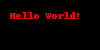

In [22]:
def pil_image():
    ''' A View that Returns a PNG Image generated using PIL'''

    from PIL import Image, ImageDraw 

    size = (100,50)             # size of the image to create
    im = Image.new('RGB', size) # create the image
    draw = ImageDraw.Draw(im)   # create a drawing object that is
                                # used to draw on the new image
    red = (255,0,0)    # color of our text
    text_pos = (10,10) # top-left position of our text
    text = "Hello World!" # text to draw
    # Now, we'll do the drawing: 
    draw.text(text_pos, text, fill=red)
    
    del draw # I'm done drawing so I don't need this anymore
    
    # We need an HttpResponse object with the correct mimetype
    #response = HttpResponse(mimetype="image/png")
    # now, we tell the image to save as a PNG to the 
    # provided file-like object
    im.save("test.png", 'PNG')

    return im # and we're done!

pil_image()

In [ ]:
%%writefile saltpost
#!/bin/bash

while true; do
  python saltpost.py
  echo "posted :"
  date
  sleep 800s
done

In [4]:
%%writefile saltpost
#!/bin/bash

while true; do
  python saltpost.py
  echo "posted :"
  date
  sleep 800s
done

Overwriting saltpost


In [68]:
#%%writefile saltpost.py
#ONE TIME MANUAL POSTS
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import sys
sys.path.insert(0,"/home/jack/hidden")
import key
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

def rndcolor():
    r = randint(50,255)
    g = randint(50,255)
    b = randint(50,255)
    rndcolor = (r,g,b) 
    return rndcolor
def get_random_line(file_name):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(0, total_bytes)
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    return file.readline()



if __name__ == '__main__':
    #nap = randint(500,1200)
    #time.sleep(nap)
    #isize = (640,640)     
    #inp = Image.new('RGB', isize)
    
    path2 = r"/home/jack/Desktop/pycode/vpython2/TrigonometryBot/images/"
    #path2 = r"bugs/advertisements1800/"
    random_filename2 = random.choice([
        y for y in os.listdir(path2)
        if os.path.isfile(os.path.join(path2, y))
    ])

    img1a = path2+"/"+random_filename2
    inp=Image.open(img1a)    
    inp = inp.resize((640,640), Image.NEAREST)
    
    
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("/home/jack/Desktop/imagebot/wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), "SaltMan", font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    #text_col2 = (0, 0, 0)  # bright green
    #halo_col2 = (255, 255,230)  # black    
    txt1=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    
    
    
    # get a font
    fs=randint(15,24)
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", fs)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    #text_col2 = (255, 255,230) # bright green
    text_col2 = rndcolor()
    halo_col2 = (0, 0, 0)   # black
    #text_col2 = (0, 0, 0)  # bright green
    #halo_col2 = (255, 255,230)  # black 
    yy=randint(70,290)
    xx=randint(5,60)
    #iword = (text_model.make_short_sentence(50))
    file_name = '/home/jack/Desktop/imagebot/saltman.txt'
    iword = get_random_line(file_name)
    
    txt3=draw_text_with_halo(txt1,(xx,yy), iword, fnt, text_col2, halo_col2)
   
    vv=randint(320,530)
    vvv=randint(5,10)
    #iword = (text_model.make_short_sentence(50))
    file_name = '/home/jack/Desktop/imagebot/saltman.txt'
    lword = get_random_line(file_name)        
    text_col3 = rndcolor()
    fs2=randint(15,24)
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", fs2)
    txt=draw_text_with_halo(txt3,(vvv,vv), lword, fnt, text_col3, halo_col2)
     
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST.jpg")

#removed keys for privacy reasons
CONSUMER_KEY = key.twiter()[0]
CONSUMER_SECRET = key.twiter()[1]
ACCESS_KEY = key.twiter()[2]
ACCESS_SECRET = key.twiter()[3]

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
#f = open("Mine.txt")
#text = f.read()
# Build the model.
#text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
#random.choice(open('Mine.txt').readlines())



file_name = '/home/jack/Desktop/imagebot/Mine.txt'
STR = get_random_line(file_name)

#STR = ("Sometimes we have visitors at night. If lucky we don't wake up.")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])
print STR


In [72]:
!showme /home/jack/Desktop/imagebot/images/Sranger-Tri-001-crop2b.jpg

# POST IMAGE AND STATUS

In [81]:
import random
from random import randint
import time
import markovify
import os
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
import Key
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
file_name = '/home/jack/Desktop/imagebot/Mine.txt'
STR = get_random_line(file_name)
#STR = ("Sometimes we have visitors at night. If lucky we don't wake up.")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST1.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])
print STR


My child`s children will be taught to pass on the stories just as my grandfather had trained my father.



In [82]:
!showme tmp/TM_POST1.jpg

In [4]:
import genim
path="junk/"
genim.RanFile(path)

'junk/20170824110113.jpg'

In [1]:
!showme tmp/TM_POST.jpg

In [58]:
#ONE TIME MANUAL POSTS
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import Key
import sys
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
nap = randint(10,35)
time.sleep(nap)
path = r"publish/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), "I_FollowBack", font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    txt=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST.jpg")

#removed keys for privacy reasons
#removed keys for privacy reasons
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("art.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

#photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])


## Picks a Random Image and Random Titles 
## Also and Signs and Posts to Twitter

In [ ]:
Easy to customize with various title sizes, colors. and locations. 

In [1]:
%%writefile wordcloud.txt
Python
Programming
ImageBot
Enjoy
f4f always
Just for You
Good Stuff
Computer Graphics
Python Fun
Python Graphics
Generator
Followback
Word Cloud
Graphics
Fun w/Python
Python Stuff
PYTHON !!!
Follow4Follow
Love`en Python
Creative Python
Graphic Fun
ImageBot
Programming

Overwriting wordcloud.txt


In [13]:
%%writefile titlenpost
#!/bin/bash

while true; do
  python titlenpost.py
  echo "posted :"
  date
  sleep 1800s
done

Overwriting titlenpost


In [96]:
%%writefile titlenpost
#!/bin/bash

while true; do
  python titlenpost.py
  echo "posted :"
  date
  sleep 1500s
done

Writing titlenpost


In [97]:
!./titlenpost

/bin/sh: 1: ./titlenpost: Permission denied


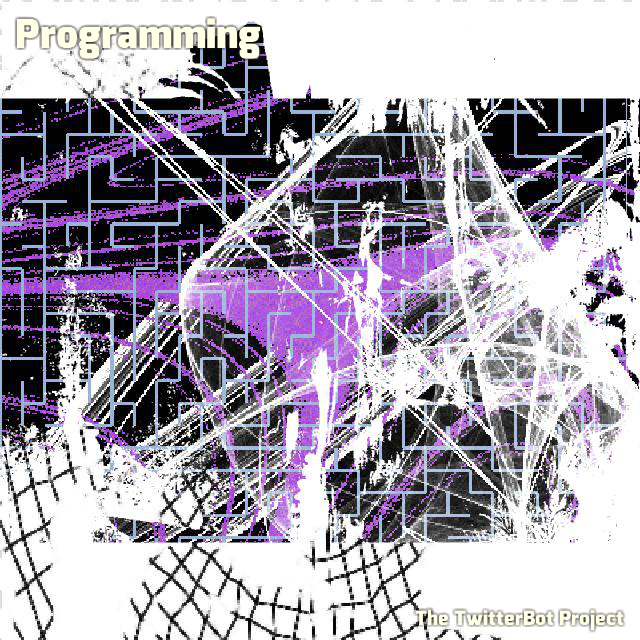

In [4]:
#Great signature
import sys
import os
import time
import random
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
path = r"publish/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), textin, font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "The TwitterBot Project" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    txt=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    # get a drawing context
    d = ImageDraw.Draw(txt)
    out = Image.alpha_composite(i2, txt)
    filename = time.strftime("tmp/%Y%m%d%H%M%S.jpg")


out

In [99]:
!cp key.py Key.py


In [140]:
!showme tmp/TM_POST1.jpg

In [114]:
#%%writefile titlenpost.py
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
import Key
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
#nap = randint(100,635)
#time.sleep(nap)
path = r"output/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_text_with_halo(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_col = (255, 255,230) # bright green
    halo_col = (0, 0, 0)   # black
    textin = (generate_the_word("/home/jack/Desktop/imagebot/wordcloud.txt"))
    i2 = draw_text_with_halo(inp, (15, 8), textin, font, text_col, halo_col)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    width, height = inp.size
    marginx = 225
    marginy = 35
    x = width - marginx
    y = height - marginy
    signature_ = "" 
    #text_col2 = (150, 255, 150) # bright green
    #halo_col2 = (0, 0, 0)   # black
    text_col2 = (255, 255,230) # bright green
    halo_col2 = (0, 0, 0)   # black
    txt=draw_text_with_halo(i2,(x,y), signature_, fnt, text_col2, halo_col2)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST1.jpg")


#removed keys for privacy reasons
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("/home/jack/Desktop/imagebot/codetalk.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST1.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Thu Nov 30 23:38:03 +0000 2017',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [{u'display_url': u'twitter.com/i/web/status/9\u2026',
    u'expanded_url': u'https://twitter.com/i/web/status/936378826111705088',
    u'indices': [117, 140],
    u'url': u'https://t.co/Uk8XC9CmnL'}],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 936378826111705088,
 u'id_str': u'936378826111705088',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'en',
 u'place': None,
 u'possibly_sensitive': False,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://blogblocks.org" rel="nofollow">jack_watch</a>',
 u'text': u'The value returned is an integer, typically one of them returns a false value, no further pro

In [115]:
!showme tmp/TM_POST1.jpg

In [73]:
!locate codetalk

/home/jack/Desktop/imagebot/codetalk.txt


In [ ]:
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
#images/perlin001-art.png
custom = "images/paper002.jpg"
filename0=(custom)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 40)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black
    #textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_blurred_back(inp, (15, 4), "Processing JS", font, text_title, blur_title)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@Jacknorthrup Instagram and @jacklnorthrup TwitterBot Project" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+15
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 35
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("copies/test_image.jpg")
    im=Image.open("copies/test_image.jpg")

In [27]:
import sqlite3
from time import sleep 
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
filein = open("allsnippets.txt","w");filein.close()
filein = open("allsnippets.txt","a")
for row in c.execute('SELECT rowid, * FROM snippet'):    

    info= (row)[2]
    info = str(info)
    info = info+"\n\n"
    filein.write(info)
    
    
filein.close()    

In [23]:
import sqlite3
from time import sleep 
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
filein = open("allsnippets.txt","w");filein.close()
filein = open("allsnippets.txt","a")
for row in c.execute('SELECT rowid, * FROM snippet'):    
    count=count+1
    sleep(.25)
    print "ID : ",(row)[0],(row)[2]," -- KEYWORDS",(row)[3],"\n"
    if count > req:
        conn.close()
        sys.exit()

ID :  1 
delimiters = ['\n', ' ', ',', '.', '?', '!', ':', 'and_what_else_you_need']
words = content
for delimiter in delimiters:
    new_words = []
    for word in words:
        new_words += word.split(delimiter)
    words = new_words
 -- KEYWORDS words, delimiter, split 

ID :  2 
def insert_info(store):
    with sqlite3.connect("misc.db") as db:
        #use a text_factory that can interpret 8-bit bytestrings 
        db.text_factory = str
        cursor = db.cursor()
        #db.text_factory = str
        sql = "insert into storeit (data0, data1, data2) values (?, ?, ?)"
        cursor.execute(sql, store)
        db.commit()
        
        OR
        conn.text_factory = str
 -- KEYWORDS text_factory, 8-bit bytestrings, 8-bit 

ID :  3 
import sqlite3
import sys
conn = sqlite3.connect('snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0
req=200
search = raw_input("Search")
#for row in c.execute('SELECT rowid,* FROM tweets WHERE text MATCH %s' % search):
for row in c.ex

ID :  19 
from PIL import Image, ImageFont
import GenIm

img = Image.open('tmmpp/HURRICANE_01.png')
position = (340,600)
text= "JackNorthrup_ImageBot"
font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 25)
col = (255,255,255,150)
halo_col = (0,0,0)
newim = GenIm.Draw_text_with_halo(img, position, text, font, col, halo_col)
newim.save("tmmpp/HURRICANE_02.png")
!showme tmmpp/HURRICANE_02.png
 -- KEYWORDS text on an image, image, text image, text, words on image 

ID :  20 
from itertools import tee
count=0
with open("realDonaldTrump_tweets.csv") as inf:
    # set up iterators
    cfg,res = tee(inf)
    # advance cfg by four lines
    for i in range(4):
        next(cfg)

    for c,r in zip(cfg, res):
        count=count+1
        if "campaign" in c:
            #print "Date :",c[21:]
            print c[39:]
 -- KEYWORDS cvs, remove characters, text edit, clean, clean text 

ID :  21 
import tweepy #https://github.com/tweepy/tweepy
import csv
import sys
sys.path.insert(0,"/home

ID :  31 
import MySQLdb
con = db.connect("localhost","root","ThinkPadT$#", "searchdb01")

param = "lesson"
c = con.cursor()
c.execute("SELECT * FROM Code WHERE Keywords LIKE %s LIMIT 1", ("%" + param + "%",))

data = c.fetchall()
for row in data :
    encodedlistvalue=base64.b64decode(row[1])
    print row[0], encodedlistvalue, '
', 'Keywords:', row[2],    '
 -----------------------------
'
c.close()
 -- KEYWORDS MySQL, base64 , b64decode, libmysqlclient-dev, searchdb01 



KeyboardInterrupt: 

In [20]:
import sqlite3
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
filein = open("allsnippets.txt","w");filein.close()
filein = open("allsnippets.txt","a")
rows = c.execute('SELECT snippet FROM snippet') 
for row in rows:
     print row

(<read-write buffer ptr 0x7ff65be1c460, size 8 at 0x7ff65be1c420>,)
(<read-write buffer ptr 0x7ff65be1c4a8, size 8 at 0x7ff65be1c468>,)
(<read-write buffer ptr 0x7ff65bf97a00, size 8 at 0x7ff65bf979c0>,)
(<read-write buffer ptr 0x7ff65be1c460, size 8 at 0x7ff65be1c420>,)
(<read-write buffer ptr 0x7ff65be1c4a8, size 8 at 0x7ff65be1c468>,)
(<read-write buffer ptr 0x7ff65bf97a00, size 8 at 0x7ff65bf979c0>,)
(<read-write buffer ptr 0x7ff65be1c460, size 8 at 0x7ff65be1c420>,)
(<read-write buffer ptr 0x7ff65be1c4a8, size 8 at 0x7ff65be1c468>,)
(<read-write buffer ptr 0x7ff65bf97a00, size 8 at 0x7ff65bf979c0>,)
(<read-write buffer ptr 0x7ff65be1c460, size 8 at 0x7ff65be1c420>,)
(<read-write buffer ptr 0x7ff65be1c4a8, size 8 at 0x7ff65be1c468>,)
(<read-write buffer ptr 0x7ff65bf97a00, size 8 at 0x7ff65bf979c0>,)
(<read-write buffer ptr 0x7ff65be1c460, size 8 at 0x7ff65be1c420>,)
(<read-write buffer ptr 0x7ff65be1c4a8, size 8 at 0x7ff65be1c468>,)
(<read-write buffer ptr 0x7ff65bf97a00, size 8 a

In [163]:
import sqlite3
import sys
from time import sleep
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
filein = open("allsnippets.txt","w");filein.close()
filein = open("allsnippets.txt","a")
rows = c.execute('SELECT rowid, * FROM snippet') 
for row in rows:
    #sleep(1)
    #print row[2]
    filein.write(row[2])

In [12]:
import sqlite3
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
search = raw_input("Search : ")
for row in c.execute('SELECT rowid, * FROM snippet WHERE keywords MATCH ?', (search,)):    
    count=count+1
    print "ID : ",(row)[0],(row)[2]," -- KEYWORDS",(row)[3],"\n"
    if count > req:
        conn.close()
        sys.exit()

Search : unknown database
ID :  84 
#find table names, unknown sqlite database
import sqlite3
import sys
from time import sleep
parts = []
database = "/home/jack/Desktop/text_stuff/database-bak/collection.db"
conn = sqlite3.connect(database)
conn.text_factory = str
c = conn.cursor()
res = c.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    sleep(2)
    
    print name[0] 
    
#explore a database unknown database find lost table tables sqlite_master sqlite tricks    

#recover column names recover field names, unknown database, unknown sqlite
import sqlite3
database = "/home/jack/Desktop/text_stuff/database-bak/collection.db"
conn = sqlite3.connect(database)
c = conn.cursor()
cur = c.execute('select * from tweets')

#this also works
#names = list(map(lambda x: x[0], cur.description))

names = [description[0] for description in cur.description]
print names[0:]
 -- KEYWORDS explore a database unknown database find lost table tables sqlite_master sqlite tr

In [ ]:
import sqlite3
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
search = raw_input("Search : ")
for row in c.execute('SELECT rowid, * FROM snippet WHERE snippet MATCH ?', (search,)):    
    count=count+1
    print "ID : ",(row)[0],(row)[2]," -- KEYWORDS",(row)[3],"\n"
    if count > req:
        conn.close()
        sys.exit()
        
------------------        

import sqlite3
import base64
conn = sqlite3.connect('/home/jack/snippet.db') 
c = conn.cursor()
conn.text_factory = str
file = """
import json
import sys
from time import sleep
import sqlite3
import csv
conn = sqlite3.connect('notebooks.db')
conn.text_factory=str 
c = conn.cursor()
#c.execute("DELETE title, line FROM ipynb where rowid MATCH '362113' "):
#c.execute("delete from ipynb where rowid=362113;"):
c.execute("DELETE FROM ipynb WHERE rowid = ?", (362113,))
conn.commit()
conn.close()
        
"""
keywords = "delete sqlite by rowid delete id rowid ROWID"
encodedlistvalue=base64.b64encode(file)
c.execute("INSERT INTO snippet VALUES (?,?,?)", (encodedlistvalue, file, keywords))
conn.commit()
conn.close()

In [2]:
%%writefile UnicodeToAscii.py
def unicodetoascii(text):

    uni2ascii = {
            ord('\xe2\x80\x99'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\x9c'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9d'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9e'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9f'.decode('utf-8')): ord('"'),
            ord('\xc3\xa9'.decode('utf-8')): ord('e'),
            ord('\xe2\x80\x9c'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x93'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x92'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x94'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x94'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x98'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\x9b'.decode('utf-8')): ord("'"),

            ord('\xe2\x80\x90'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x91'.decode('utf-8')): ord('-'),

            ord('\xe2\x80\xb2'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb3'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb4'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb5'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb6'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb7'.decode('utf-8')): ord("'"),

            ord('\xe2\x81\xba'.decode('utf-8')): ord("+"),
            ord('\xe2\x81\xbb'.decode('utf-8')): ord("-"),
            ord('\xe2\x81\xbc'.decode('utf-8')): ord("="),
            ord('\xe2\x81\xbd'.decode('utf-8')): ord("("),
            ord('\xe2\x81\xbe'.decode('utf-8')): ord(")"),

                            }
    return text.decode('utf-8').translate(uni2ascii).encode('ascii')

#print unicodetoascii("weren\xe2\x80\x99t")  

Overwriting UnicodeToAscii.py


In [ ]:
import UnicodeToAscii
UnicodeToAscii.unicodetoascii()

In [3]:
import UnicodeToAscii
text = """
'\xe2\x81\xbafd fdfdf df \xe2\x81\xbb decode \xe2\x81\xbc code 'utf-8\xe2\x81\xbd' 
code'\xe2\x81\xbe'.decode('utf-8'))"""
UnicodeToAscii.unicodetoascii(text)

"\n'+fd fdfdf df - decode = code 'utf-8(' \ncode')'.decode('utf-8'))"

In [8]:
import sqlite3
import sys
conn = sqlite3.connect('/home/jack/snippet.db')
conn.text_factory = str
c = conn.cursor()
count=0;req=200
search = raw_input("Search : ")
for row in c.execute('SELECT rowid, * FROM snippet WHERE snippet MATCH ?', (search,)):    
    count=count+1
    print "ID : ",(row)[0],(row)[2]," -- KEYWORDS",(row)[3],"\n"
    if count > req:
        conn.close()
        sys.exit()

Search : lost column names
ID :  60 
import sqlite3
connection = sqlite3.connect('notebooks.db')
connection.row_factory = sqlite3.Row
cursor = connection.execute('select * from ipynb')
# instead of cursor.description:
row = cursor.fetchone()
names = row.keys()
print names
 -- KEYWORDS get column names, lost column names, unknown colums 



In [22]:
import sqlite3
import base64
conn = sqlite3.connect('/home/jack/snippet.db') 
c = conn.cursor()
conn.text_factory = str
file = """

"""
keywords = """

"""
encodedlistvalue=base64.b64encode(file)
c.execute("INSERT INTO snippet VALUES (?,?,?)", (encodedlistvalue, file, keywords))
conn.commit()
conn.close()

In [13]:
import os
import sys
from PIL import Image
import shutil
import time
import random

filename0=("images/sun002.png")
#filename1=("/home/jack/Desktop/imagebot/instagram/20170828173214.png")
filename1=("/home/jack/Desktop/Processing/Processing/images/experiment000a.png")
shutil.copy2(filename0, 'copies/') # complete target filename given
shutil.copy2(filename1, 'copies/')# target filename is /dst/dir/file.ext

aa = Image.open(filename0).convert("RGB")
#bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
bb = Image.open(filename1).convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("copies/aa.png")
yy.save("copies/bb.png")
src = Image.open('copies/aa.png').convert('RGB')
dst = Image.open('copies/bb.png').convert('RGB')
src.save("copies/aa.png")
dst.save("copies/bb.png")



n = 5 #number of partitions per channel.


src_handle = Image.open("copies/bb.png")
dst_handle = Image.open("copies/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
    
    

filename = time.strftime("images/exchange%Y%m%d%H%M%S.png")
dst_handle.save(filename)

shutil.copy2(filename, "copies/")
print filename

(152, 134, 119)
images/exchange20171120165112.png


In [ ]:
# %load titlenpost.py
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
import Key
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
nap = randint(100,635)
time.sleep(nap)
path = r"output/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))


if __name__ == '__main__':
    inp = Image.open(filename0)
    font = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black
    #textin = (generate_the_word("wordcloud.txt"))
    i2 = draw_blurred_back(inp, (15, 4), "Python Generated Art", font, text_title, blur_title)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@Jacknorthrup Instagram and @jacklnorthrup TwitterBot Project" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+12
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 35
    x = width - marginx
    y = height - marginy    
    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST1.jpg")


#removed keys for privacy reasons
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("/home/jack/Desktop/imagebot/codetalk.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST1.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

# SPECIAL POSTS

In [155]:
#%%writefile titlenpost.py
#!/home/jack/anaconda2/python
import random
from random import randint
import time
import markovify
import os
import sys
import Key
sys.path.insert(1, "/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageFilter
#nap = randint(100,635)
#time.sleep(nap)
path = r"output/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
#filename0=(path+base_image)
filename0 ="Images/segmented20171201092551.png"

def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]

def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))


if __name__ == '__main__':
    inp = Image.open(filename0)
    #fnt = "/home/jack/.fonts/dontmix.ttf"
    fnt = "/home/jack/.fonts/Exo-Black.ttf"
    font = ImageFont.truetype(fnt, 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black
    #textin = (generate_the_word("wordcloud.txt"))
    #i2 = draw_blurred_back(inp, (15, 4), "Python Generated Art", font, text_title, blur_title)
    i2 = draw_blurred_back(inp, (45, 35), "Python Generated Art", font, text_title, blur_title)
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = "/home/jack/.fonts/dontmix.ttf"
    #fnt = "/home/jack/.fonts/Exo-Black.ttf"    
    
    #fnt = ImageFont.truetype(fnt, 20)
    fnt = ImageFont.truetype(fnt, 24)
    # get a drawing context
    signature_ = "@Jacknorthrup Instagram and @jacklnorthrup TwitterBot Project" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+12
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    #marginy = 35
    marginy = 55
    x = width - marginx
    y = height - marginy    
    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("tmp/TM_POST1.jpg")


#removed keys for privacy reasons
CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
f = open("/home/jack/Desktop/imagebot/codetalk.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
STR = (text_model.make_short_sentence(140))
#STR = " #Python Segmentation Art"
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "tmp/TM_POST1.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

In [157]:
!showme tmp/TM_POST1.jpg

# Pallet Swap

In [15]:
!ls /home/jack/Desktop/post

allnew001.jpg  allnew004.jpg  ball003.png  ball006.png	neat.png
allnew002.jpg  ball001.png    ball004.png  ball007.png	order.jpg
allnew003.jpg  ball002.png    ball005.png  junk


In [24]:
!ls tmp

01aab.jpg	    20171201201741.png	20171201202301.png
01.jpg		    20171201201742.png	20171201202302.png
02.jpg		    20171201202240.jpg	20171201202303.png
03.jpg		    20171201202241.jpg	20171201202304.png
03.png		    20171201202242.jpg	20171201202305.png
05a.jpg		    20171201202243.jpg	20171201202306.png
20171201195708.jpg  20171201202244.jpg	20171201202307.png
20171201195712.jpg  20171201202245.jpg	20171201202308.png
20171201195715.jpg  20171201202246.jpg	20171201202309.png
20171201195718.jpg  20171201202247.jpg	20171201202310.png
20171201195721.jpg  20171201202248.jpg	20171201203219.jpg
20171201195725.jpg  20171201202249.jpg	20171201203220.jpg
20171201195728.jpg  20171201202250.jpg	20171201203241.jpg
20171201195731.jpg  20171201202251.jpg	20171201203242.jpg
20171201195734.jpg  20171201202252.jpg	20171201203326.jpg
20171201200351.jpg  20171201202253.jpg	20171201203327.jpg
20171201200352.jpg  20171201202254.jpg	output.jpg
20171201200353.jpg  20171201202255.jpg	seg001.png
20171201201605.pn

In [28]:
!showme /home/jack/Desktop/PROCESSING/color-wander/images/kk.png


** (Image Viewer:5120): WARNING **: Couldn't connect to accessibility bus: Failed to connect to socket /tmp/dbus-rBrPgBG0su: Connection refused


In [37]:
import sys
from PIL import Image
import shutil
import time
import random
import os, errno
try:
    os.makedirs("instagram/")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("junk2/")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise        
filename1='tmp/seg001.png'
filename0='/home/jack/Desktop/PROCESSING/color-wander/images/kk.png'
shutil.copy2(filename0, 'instagram/') # complete target filename given
shutil.copy2(filename1, 'instagram/')# target filename is /dst/dir/file.ext

aa = Image.open(filename0).convert("RGB")
#bb = Image.open("/home/jack/Documents/GG.jpg").convert("RGB")
bb = Image.open(filename1).convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("junk2/aa.png")
yy.save("junk2/bb.png")
src = Image.open('junk2/aa.png').convert('RGB')
dst = Image.open('junk2/bb.png').convert('RGB')
src.save("junk2/aa.png")
dst.save("junk2/bb.png")
n = 5 #number of partitions per channel.
src_handle = Image.open("junk2/bb.png")
dst_handle = Image.open("junk2/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"

def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l

lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)

def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])

lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)

for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
    
    
filename = time.strftime("junk2/PalletteTemp.jpg")

dst_handle.save(filename)

shutil.copy2(filename, "instagram/")
print filename

(255, 255, 255)
junk2/PalletteTemp.jpg


In [48]:
!showme junk2/PalletteTemp.jpg



** (Image Viewer:6112): WARNING **: Couldn't connect to accessibility bus: Failed to connect to socket /tmp/dbus-rBrPgBG0su: Connection refused


In [47]:
!showme junk2/aa.png


** (Image Viewer:6105): WARNING **: Couldn't connect to accessibility bus: Failed to connect to socket /tmp/dbus-rBrPgBG0su: Connection refused


In [60]:
# Simple bijective function
#   Basically encodes any integer into a base(n) string,
#     where n is ALPHABET.length.
#   Based on pseudocode from http://stackoverflow.com/questions/742013/how-to-code-a-url-shortener/742047#742047

ALPHABET = list("abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")
  # make your own alphabet using:
  # (('a'..'z').to_a + ('A'..'Z').to_a + (0..9).to_a).shuffle.join

def bijective_encode(i):
    # from http://refactormycode.com/codes/125-base-62-encoding
    if i == 0:
        return ALPHABET[0]
    s = ''
    base = len(ALPHABET)
    while i > 0:
        s += ALPHABET[i % base]
        i /= base
    return s[::-1] # reverse string


def bijective_decode(s):
    # based on base2dec() in Tcl translation 
    # at http://rosettacode.org/wiki/Non-decimal_radices/Convert#Ruby
    i = 0
    base = len(ALPHABET)
    for char in s:
        i = i * base + ALPHABET.index(char)
    return i

# Two little demos:

numbers = 1234567890
result = bijective_encode(numbers)
print result #xyz

letters = 'Jack Northrup'
new_number = bijective_decode(letters)
print new_number #66

bpxvMS
140732912634465149888163


In [62]:
import pickledb
db = pickledb.load('example.db', False)


In [64]:
tx = db.get('key')
print tx

None
